# single month bootstrap check

In [8]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import umap

In [2]:
year, month = 2007, '01'
num_sims = 10

model_path = '/sciclone/proj-ds/geograd/stmorse/reddit/bootstrap/models'

models = []
for sim in range(num_sims):
    with open(os.path.join(model_path, f"model_cc_{year}-{month}_{sim}.npz"), "rb") as f:
        model = np.load(f)["cc"]
        models.append(model.copy())
print(len(models))
print(models[0].shape)

10
(50, 384)


In [3]:
all_cc = np.vstack(models)
cc2d = umap.UMAP(n_components=2).fit_transform(all_cc)
cc2d.shape

/sciclone/home/stmorse/projects/dtm/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(500, 2)

In [9]:
ccpca = PCA(n_components=2).fit_transform(all_cc)

In [7]:
print(models[0][:5,:5])
print(models[6][:5,:5])

[[-0.00095521  0.04951275  0.13583712  0.06764722  0.13586369]
 [ 0.0177587   0.00216225 -0.05016258  0.00402367 -0.07458314]
 [-0.06475656 -0.00698154  0.11995836 -0.08911786  0.00510477]
 [-0.09453698 -0.02401113 -0.01821952 -0.04004456 -0.00452543]
 [-0.05473853  0.01593457  0.03418399 -0.01429573 -0.01879776]]
[[-0.00095521  0.04951275  0.13583712  0.06764722  0.13586369]
 [ 0.0177587   0.00216225 -0.05016258  0.00402367 -0.07458314]
 [-0.06475656 -0.00698154  0.11995836 -0.08911786  0.00510477]
 [-0.09453698 -0.02401113 -0.01821952 -0.04004456 -0.00452543]
 [-0.05473853  0.01593457  0.03418399 -0.01429573 -0.01879776]]


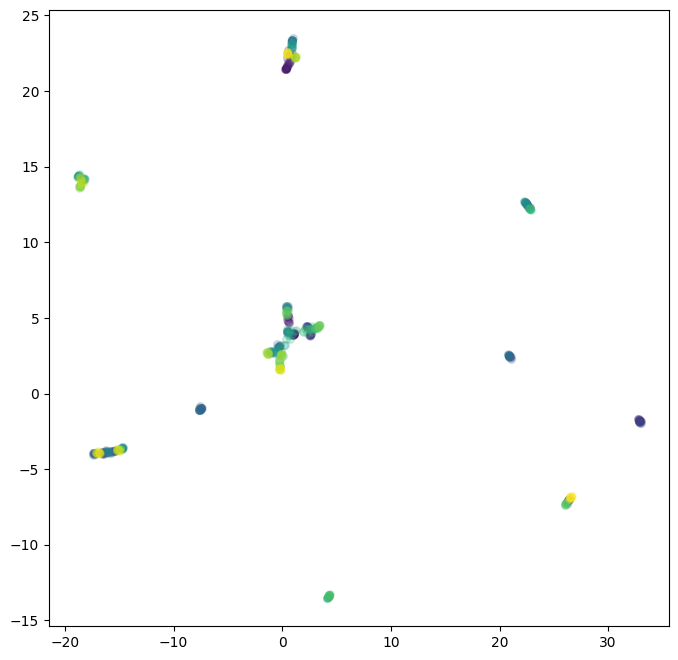

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

colors = plt.cm.viridis(np.linspace(0, 1, 50))

for i in range(50):
    ixs = np.arange(i, ccpca.shape[0], 50)
    ax.scatter(cc2d[ixs,0], cc2d[ixs,1], s=30, color=colors[i], alpha=0.2)

In [ ]:
year, month = 2007, '01'

model_path = '/sciclone/proj-ds/geograd/stmorse/reddit/bootstrap/models'
# label_path = '/sciclone/geograd/stmorse/reddit/mbkm_50/bootstrap/labels'
align_path = '/sciclone/geograd/stmorse/reddit/mbkm_50/bootstrap/align'

with open(os.path.join(align_path, f'align_model_{year}-{month}_labels.npz'), 'rb') as f:
    labels = np.load(f)['labels']
with open(os.path.join(align_path, f'cu2d_{year}-{month}.npz'), 'rb') as f:
    Cu2d = np.load(f)['Cu2d']

/local/scr/stmorse/TMPDIR/ipykernel_2252515/210301092.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(Cu2d[idx,0], Cu2d[idx,1], s=50, c=colors[label], marker='o', alpha=0.05)


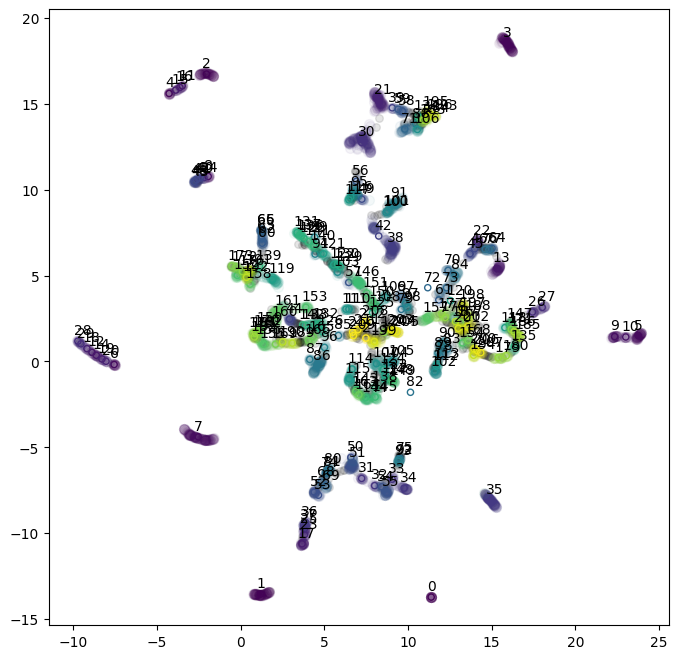

In [18]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

colors = plt.cm.viridis(np.linspace(0,1,np.amax(labels)))

idx = np.where(labels == -1)[0]
ax.scatter(Cu2d[idx,0], Cu2d[idx,1], s=30, c='k', alpha=0.1)

for label in np.arange(np.amax(labels)):
    idx = np.where(labels == label)[0]
    ax.scatter(Cu2d[idx,0], Cu2d[idx,1], s=50, c=colors[label], marker='o', alpha=0.05)
    
    # cluster midpoint
    mid = np.mean(Cu2d[idx,:], axis=0)
    ax.scatter(
        mid[0], mid[1], 
        s=20, facecolors='none', edgecolors=colors[label], 
        marker='o', linewidths=1
    )
    
    ax.annotate(label, xy=tuple(mid), xytext=tuple(mid + [-0.25, 0.4]))

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [10]:
Cu2d.shape

(5000, 2)

In [20]:
df = pd.read_csv(
    f'/sciclone/geograd/stmorse/reddit/mbkm_50/bootstrap/'
    f'tab/table_{year}-{month}.csv'
)
df.head()

,coi,size,diam,disp,lam,pve
0,0,18,0.243851,0.007900,1.403281,0.3541
1,1,82,0.239186,0.018371,0.632586,0.1212
2,2,60,0.078824,0.005237,1.482760,0.1257
3,3,104,0.417531,0.038636,0.371694,0.2259
4,4,12,0.100510,0.052638,4.010738,0.0015


In [21]:
df[df['pve'] < 0.01]

,coi,size,diam,disp,lam,pve
4,4,12,0.100510,0.052638,4.010738,0.0015
5,5,56,0.287399,0.050970,3.297343,0.0033
15,15,8,0.081586,0.034385,1.979256,0.0070
40,40,7,0.050005,0.050005,1.095768,0.0076
42,42,39,0.424240,0.258919,10.664610,0.0009
44,44,31,0.344560,0.245747,6.149445,0.0021
50,50,11,0.409029,0.181329,9.362151,0.0083
52,52,30,0.291977,0.073650,10.662645,0.0093
55,55,39,0.231202,0.121194,8.581506,0.0011
86,86,89,0.352571,0.122244,0.912893,0.0021


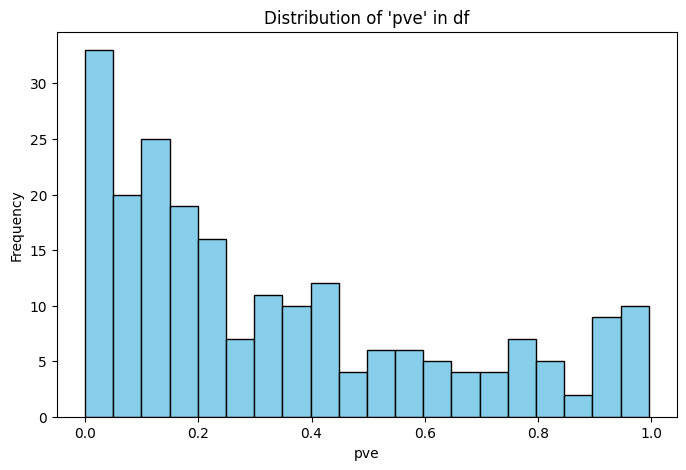

In [22]:
plt.figure(figsize=(8, 5))
plt.hist(df['pve'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('pve')
plt.ylabel('Frequency')
plt.title("Distribution of 'pve' in df")
plt.show()

# check metadata

In [1]:
import json

import bz2                # for .bz2
import lzma               # for .xz
import zstandard as zstd  # for .zst

In [2]:
def open_compressed(file_path):
    if file_path.endswith('.bz2'):
        return bz2.BZ2File(file_path, 'rb')
    elif file_path.endswith('.xz'):
        return lzma.open(file_path, 'rb')
    elif file_path.endswith('.zst'):
        # For .zst, return a stream reader
        f = open(file_path, 'rb')  # Open file in binary mode
        dctx = zstd.ZstdDecompressor(max_window_size=2**31)
        return dctx.stream_reader(f)
        # return dctx.read_to_iter(f)
    else:
        raise ValueError('Unsupported file extension.')

def read_sentences(file_path, chunk_size=10000):
    """
    Read JSON entries from a compressed file, extract the 'body' field,
    and yield chunks of size `chunk_size`.
    """
    buffer = []  # To store 'body' fields in chunks
    byte_buffer = b""  # For handling partial lines in `.zst` files

    with open_compressed(file_path) as f:
        # Iterate over the file
        for chunk in iter(lambda: f.read(8192), b""):  # Read file in binary chunks
            byte_buffer += chunk

            # Process each line in the byte buffer
            while b"\n" in byte_buffer:
                line, byte_buffer = byte_buffer.split(b"\n", 1)

                # Parse JSON and process the 'body' field
                entry = json.loads(line.decode("utf-8"))

                if 'body' not in entry or entry['author'] == '[deleted]':
                    continue

                # Truncate long 'body' fields
                body = entry['body']
                if len(body) > 2000:
                    body = body[:2000]

                # Add to the chunk buffer
                buffer.append(body)
                if len(buffer) >= chunk_size:
                    yield buffer
                    buffer = []

        # Handle any remaining partial JSON line
        if byte_buffer:
            entry = json.loads(byte_buffer.decode("utf-8"))
            if 'body' in entry and entry['author'] != '[deleted]':
                body = entry['body']
                if len(body) > 2000:
                    body = body[:2000]
                buffer.append(body)

        # Yield any leftovers in the chunk buffer
        if buffer:
            yield buffer


In [3]:
res = read_sentences(
    '/sciclone/data10/twford/reddit/reddit/comments/RC_2016-01.bz2',
    chunk_size=10)

In [5]:
res = [s for s in res]

KeyboardInterrupt: 

# data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('/sciclone/geograd/stmorse/reddit/totals.csv')
df.head()

,year,month,subtotal
0,2006,1,2773
1,2006,2,6709
2,2006,3,9859
3,2006,4,14028
4,2006,5,19840


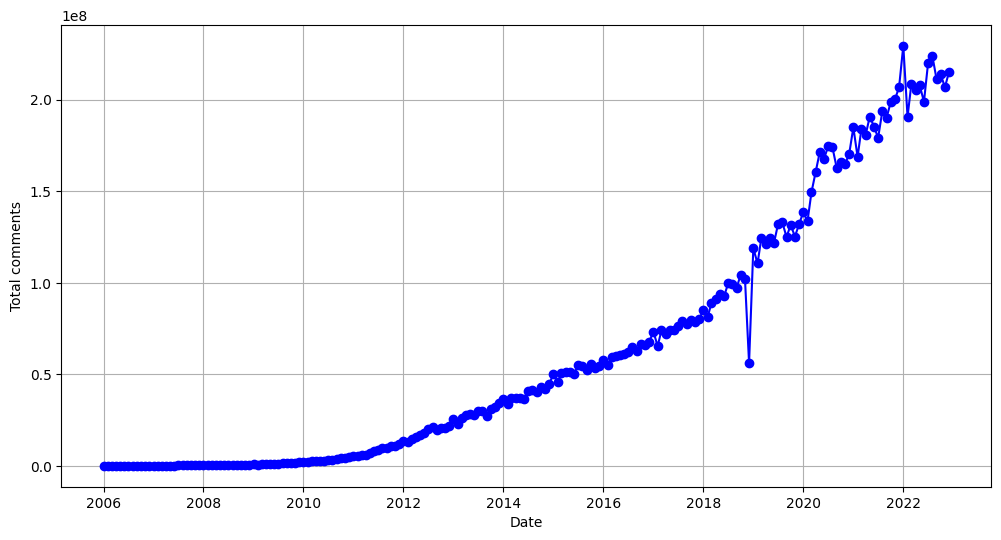

In [9]:
# Combine year and month into a datetime column
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Calculate the cumulative sum of 'subtotal'
df['cumsum'] = df['subtotal'].cumsum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['subtotal'], marker='o', color='b', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total comments')
plt.grid(True)
plt.show()

# two-sample hotteling

In [4]:
import numpy as np
from scipy.stats import f
from sklearn.decomposition import PCA

In [2]:
def hotelling_t2_test(X, Y):
    """
    Perform a two-sample Hotelling's T-squared test.
    
    Parameters:
        X: np.ndarray of shape (n1, p) - First sample group (n1 observations, p variables)
        Y: np.ndarray of shape (n2, p) - Second sample group (n2 observations, p variables)
    
    Returns:
        T2: Hotelling's T-squared statistic
        F_value: Corresponding F-statistic
        p_value: p-value for the test
    """
    X, Y = np.asarray(X), np.asarray(Y)
    n1, p = X.shape
    n2, _ = Y.shape
    
    # Compute sample means
    x_bar = np.mean(X, axis=0)
    y_bar = np.mean(Y, axis=0)
    
    # Compute sample covariance matrices
    S1 = np.cov(X, rowvar=False, ddof=1)
    S2 = np.cov(Y, rowvar=False, ddof=1)
    
    # Compute pooled covariance matrix
    Sp = ((n1 - 1) * S1 + (n2 - 1) * S2) / (n1 + n2 - 2)
    
    # Compute Hotelling's T-squared statistic
    mean_diff = x_bar - y_bar
    Sp_inv = np.linalg.inv(Sp)  # Inverse of pooled covariance matrix
    T2 = (n1 * n2) / (n1 + n2) * mean_diff.T @ Sp_inv @ mean_diff
    
    # Convert to F-statistic
    F_value = ((n1 + n2 - p - 1) / ((n1 + n2 - 2) * p)) * T2
    df1, df2 = p, (n1 + n2 - p - 1)
    
    # Compute p-value
    p_value = 1 - f.cdf(F_value, df1, df2)
    
    return T2, F_value, p_value

In [7]:
d = 380
n = 30
X = np.random.multivariate_normal(mean=np.zeros(d), cov=np.eye(d), size=n)
Y = np.random.multivariate_normal(mean=np.zeros(d), cov=np.eye(d), size=n)

T2, F_value, p_value = hotelling_t2_test(X, Y)
print(f"Hotelling's T²: {T2:.4f}")
print(f"F-value: {F_value:.4f}")
print(f"p-value: {p_value:.4f}")

data = np.vstack((X, Y))
data = PCA(n_components=10).fit_transform(data)
T2, F_value, p_value = hotelling_t2_test(data[:n,:], data[n:,:])
print(f"Hotelling's T²: {T2:.4f}")
print(f"F-value: {F_value:.4f}")
print(f"p-value: {p_value:.4f}")

Hotelling's T²: -305904544822098752.0000
F-value: 4455324813425304.0000
p-value: nan
Hotelling's T²: 8.1230
F-value: 0.6863
p-value: 0.7319


# RW check

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import umap

/sciclone/geograd/stmorse/dtm/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
n, d = 50, 384

data = []

steps = np.random.multivariate_normal(np.ones(d), np.eye(d), size=n)
walk = np.cumsum(steps, axis=0)
data.append(walk)

steps = np.random.multivariate_normal(np.zeros(d), np.eye(d), size=n)
walk = np.cumsum(steps, axis=0)
data.append(walk)

points = np.random.multivariate_normal(np.zeros(d), np.eye(d), size=n)
data.append(points)

data = np.vstack(data)

data2d = umap.UMAP(n_components=2).fit_transform(data)

/sciclone/geograd/stmorse/dtm/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


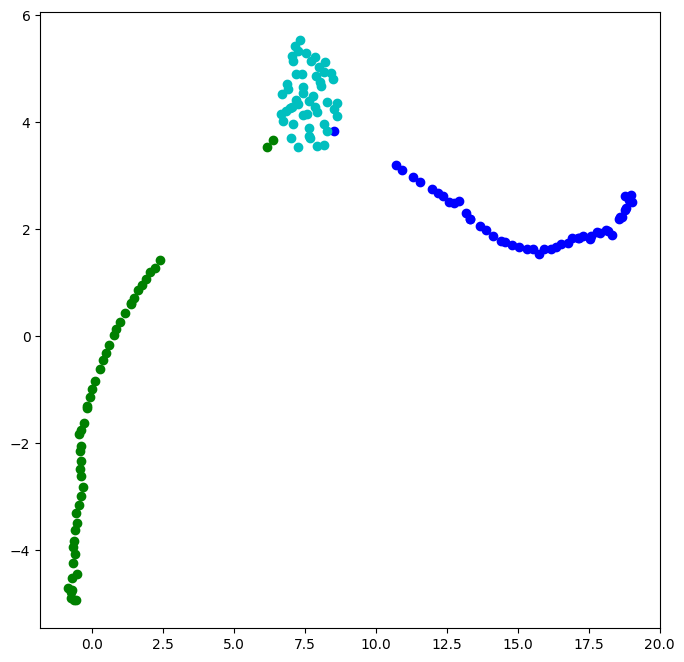

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.scatter(data2d[:n,0], data2d[:n,1], c='g')
ax.scatter(data2d[n:2*n,0], data2d[n:2*n,1], c='b')
ax.scatter(data2d[2*n:3*n,0], data2d[2*n:3*n,1], c='c')

# manova with data

In [8]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import umap

from scipy.stats import f

/sciclone/geograd/stmorse/dtm/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# load aligned model
# pick cluster
# load embeddings from that cluster

In [11]:
with open('/sciclone/geograd/stmorse/reddit/mbkm_50/align/align_model_HDBSCAN_labels.pkl', 'rb') as f:
    labels = np.load(f)['labels']

labels.shape

(1800,)

In [12]:
np.unique(labels, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

In [15]:
goi = 6  # israel

Ck = 50
n_time_periods = labels.shape[0] // Ck

gidx = np.where(labels == goi)[0]

# get cluster labels and time period
cluster_labels = gidx % Ck
time_periods = gidx // Ck

In [16]:
cluster_labels

array([17,  3, 16, 12, 25, 48, 12, 35, 41, 23,  9, 22, 49, 13,  5,  1,  0,
       42,  7, 16])

In [17]:
time_periods

array([ 1,  6,  6,  7,  7,  7,  8,  9, 14, 17, 24, 25, 26, 27, 28, 29, 30,
       33, 34, 35])

In [25]:
z = np.array([5, 7, 7, 10])
np.repeat(z, 3)

array([ 5,  5,  5,  7,  7,  7,  7,  7,  7, 10, 10, 10])

In [ ]:
# go by time period, load tfidf, get closest indices, then load those from embeddings
# we want a matrix of 100-line blocks of closest embedding to centroid

start_year, end_year = 2006, 2008
yrmo = [(yr, mo) for yr in range(start_year, end_year+1) for mo in range(1,13)]

# loop on time periods
for i, (yr, mo) in enumerate(yrmo):
    # if no clusters from this group in this time period, skip
    if i not in time_periods:
        continue

    with open(f'/sciclone/geograd/stmorse/reddit/mbkm_50/tfidf/tfidf_{yr}-{mo:02}.pkl', 'rb') as f:
        tfidf = pickle.load(f)

    # get indices in time_periods where this time period occurs
    # so we can get the associated label in cluster_label
    cix = np.where(time_periods == i)[0]

    # loop on cluster label
    for ix in cix:
        cl = cluster_labels[ix]

        # get the top 100 closest comments to the centroid in this cluster
        sample_idx = tfidf['tfidf'][cl]['sample_indices']

        

In [24]:
tfidf['tfidf'][0].keys()

dict_keys(['sample_indices', 'keywords'])

# manova tests

In [7]:
import numpy as np
from scipy.stats import f

In [10]:
def generate_data(n_per_group=50, d=10, seed=0):
    """
    Generate data in d dimensions from 3 distinct normal distributions
    with different means. Returns (X, labels).
    """
    rng = np.random.default_rng(seed)
    
    # Distinct means in d=10, spaced out for clarity
    # mean1 = np.zeros(d)
    mean1 = np.ones(d)
    mean2 = np.ones(d)
    # mean3 = np.arange(d) * 0.5  # just for variety
    mean3 = np.ones(d)

    cov = np.eye(d)  # identity covariance for simplicity

    X1 = rng.multivariate_normal(mean1, cov, size=n_per_group)
    X2 = rng.multivariate_normal(mean2, cov, size=n_per_group)
    X3 = rng.multivariate_normal(mean3, cov, size=n_per_group)

    # Combine and create group labels
    X = np.vstack([X1, X2, X3])
    labels = np.array([0]*n_per_group + [1]*n_per_group + [2]*n_per_group)
    return X, labels

def manova_pillai_trace(X, labels):
    """
    Perform one-way MANOVA using Pillai's trace.
    X     : (N x d) data matrix
    labels: (N,) array of group labels
    Returns (pillai, F_approx, p_value).
    """
    # Basic shapes and group info
    X = np.asarray(X)
    labels = np.asarray(labels)
    groups = np.unique(labels)
    n_groups = len(groups)
    N, d = X.shape

    # Group means, overall mean
    overall_mean = X.mean(axis=0)
    group_means = []
    ns = []
    for g in groups:
        Xg = X[labels == g]
        group_means.append(Xg.mean(axis=0))
        ns.append(len(Xg))
    group_means = np.array(group_means)
    ns = np.array(ns)
    
    # Between-group scatter matrix B
    B = np.zeros((d, d))
    for i, g in enumerate(groups):
        mean_diff = group_means[i] - overall_mean
        B += ns[i] * np.outer(mean_diff, mean_diff)

    # Within-group scatter matrix W
    W = np.zeros((d, d))
    for i, g in enumerate(groups):
        Xg = X[labels == g]
        mg = group_means[i]
        diffs = Xg - mg
        W += diffs.T @ diffs
    
    # Solve generalized eigenproblem for M = inv(W)B (or do M = W^-1 * B)
    # We'll do an eig on W^-1 B. For stability, use e.g. eigh on W^-1 B if invertible
    W_inv = np.linalg.inv(W)
    M = W_inv @ B
    eigvals = np.linalg.eigvals(M)
    
    # Pillai's trace = sum_{i=1..r} lambda_i / (1 + lambda_i) for all real eigenvalues
    # (We assume d <= n_groups*N, so W is invertible in this toy example.)
    # But for one-way MANOVA, "s" is min(d, n_groups-1).
    # We'll keep only the top 's' real parts of eigenvalues
    # in case of minor numerical imaginary parts.
    s = min(d, n_groups - 1)
    # Sort descending by real part just to be safe
    real_eigs = np.sort(eigvals.real)[::-1][:s]
    pillai = np.sum(real_eigs / (1 + real_eigs))
    
    # Approximate F-test for Pillai’s trace:
    #   m = 0.5 * (|p - g + 1| - 1)
    #   Napprox = 0.5 * (N - g - 1)
    #   F = [ (2*Napprox + s + 1)/(2*m + s + 1 ) ] * [ pillai / (s - pillai) ]
    #   df1 = s*(2*m + s + 1),   df2 = s*(2*Napprox + s + 1)
    p = d
    g = n_groups
    m = 0.5 * (abs(p - g + 1) - 1)
    Napprox = 0.5 * (N - g - 1)
    num = (2 * Napprox + s + 1)
    den = (2 * m + s + 1)
    
    F_stat = (num / den) * (pillai / (s - pillai))
    df1 = s * (2*m + s + 1)
    df2 = s * (2*Napprox + s + 1)
    
    # p-value
    p_value = 1 - f.cdf(F_stat, df1, df2)
    
    return pillai, F_stat, p_value

In [11]:
X, labels = generate_data()
pillai, F_stat, p_val = manova_pillai_trace(X, labels)
print(f"Pillai's Trace: {pillai:.4f}")
print(f"Approx F-Statistic: {F_stat:.4f}")
print(f"p-value: {p_val:.6f}")

Pillai's Trace: 0.1439
Approx F-Statistic: 1.1550
p-value: 0.293113


# umap / rw experiment

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import umap

/sciclone/geograd/stmorse/dtm/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


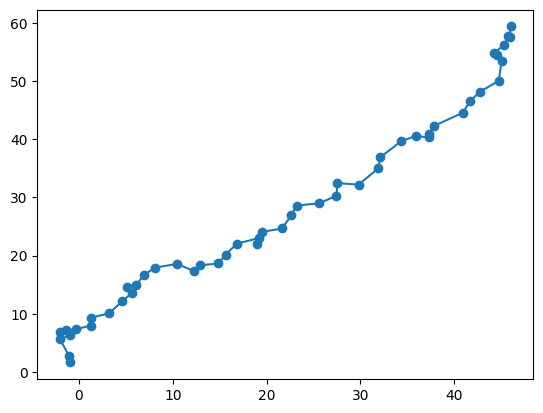

In [4]:
n, d = 50, 2
steps = np.random.normal(loc=1, scale=1, size=(n, d))
walk = np.cumsum(steps, axis=0)
plt.plot(walk[:, 0], walk[:, 1], 'o-')

/sciclone/geograd/stmorse/dtm/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


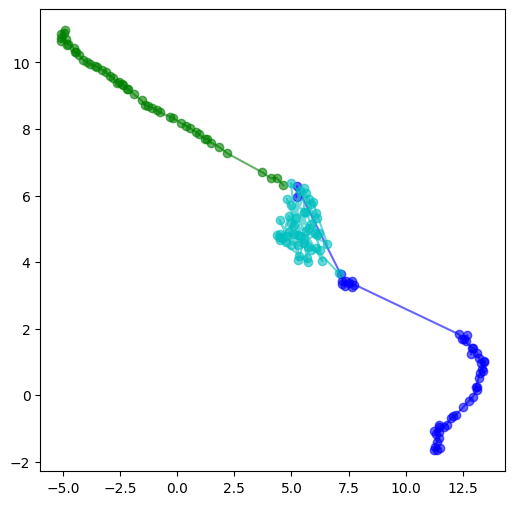

In [9]:
np.random.seed(314)
d = 10      # dimension
s = 1       # stdevs
n = 50      # num steps (time periods)

data = []

# generate RW
steps = np.random.normal(loc=0, scale=s, size=(n, d))
walk = np.cumsum(steps, axis=0)
data.append(walk)

# generate non-RW
steps = np.random.normal(loc=1, scale=1, size=(n, d))
walk = np.cumsum(steps, axis=0)
data.append(walk)

# generate samples from normal dist
walk = np.random.normal(loc=0, scale=1, size=(n, d))
data.append(walk)

data = np.vstack(data)

# dim reduce
data2d = umap.UMAP(n_components=2).fit_transform(data)

# plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

for i, c in enumerate(['b', 'g', 'c']):
    a, b = i*n, (i+1)*n
    ax.plot(data2d[a:b,0], data2d[a:b,1], 
            color=c, linestyle='-', marker='o', alpha=0.6)

# ax.legend(title='stdev')
plt.show()

# test file formats

In [1]:
import bz2
import lzma
import json
import zstandard as zstd

In [2]:
zstd.__version__

'0.23.0'

In [8]:
def open_compressed(file_path):
    """
    Open compressed files based on their extension.
    Supports .bz2, .xz, and .zst.
    """
    if file_path.endswith('.bz2'):
        return bz2.BZ2File(file_path, 'rb')
    elif file_path.endswith('.xz'):
        return lzma.open(file_path, 'rb')
    elif file_path.endswith('.zst'):
        # For .zst, return a stream reader
        f = open(file_path, 'rb')  # Open file in binary mode
        dctx = zstd.ZstdDecompressor()
        return dctx.stream_reader(f)
    else:
        raise ValueError('Unsupported file extension.')

def read_sentences(file_path, chunk_size=10000):
    """
    Read JSON entries from a compressed file, extract the 'body' field,
    and yield chunks of size `chunk_size`.
    """
    buffer = []  # To store 'body' fields in chunks
    byte_buffer = b""  # For handling partial lines in `.zst` files

    with open_compressed(file_path) as f:
        # Iterate over the file
        for chunk in iter(lambda: f.read(8192), b""):  # Read file in binary chunks
            byte_buffer += chunk

            # Process each line in the byte buffer
            while b"\n" in byte_buffer:
                line, byte_buffer = byte_buffer.split(b"\n", 1)

                # Parse JSON and process the 'body' field
                entry = json.loads(line.decode("utf-8"))

                if 'body' not in entry or entry['author'] == '[deleted]':
                    continue

                # Truncate long 'body' fields
                body = entry['body']
                if len(body) > 2000:
                    body = body[:2000]

                # Add to the chunk buffer
                buffer.append(body)
                if len(buffer) >= chunk_size:
                    yield buffer
                    buffer = []

        # Handle any remaining partial JSON line
        if byte_buffer:
            entry = json.loads(byte_buffer.decode("utf-8"))
            if 'body' in entry and entry['author'] != '[deleted]':
                body = entry['body']
                if len(body) > 2000:
                    body = body[:2000]
                buffer.append(body)

        # Yield any leftovers in the chunk buffer
        if buffer:
            yield buffer


In [10]:
for sentences in read_sentences('/sciclone/data10/twford/reddit/reddit/comments/RC_2018-08.xz', chunk_size=10):
    print(sentences)
    break

['That’s amazing! Can you send me a link please?', 'Yea as amazing as this looks there is no way the cost is worth it when there are so few major airline crashes yearly.', 'Cuentan cosas del último vagón de cada metro, si eres gay té puede interesar. Si no, no. ', 'Manafort is getting deep dicked by Bobby Three Sticks. ', 'Silence...I guess that is your answer.', 'So I’ve often wondered this...\n\nLike I know most politicians don’t know a lot of what’s going on. And like you said, need-to-know basis. So I’ve always wondered...who *does* know all the dirty secrets, confidential information, and hidden doors, so to speak? Like what person or group knows all the shit that goes on behind closed doors?\n\nI’m sure it’s some people no one’s ever heard of which would make sense. But it’s just fascinating that there’s a layer below the politics and general government where shit actually happens. ', 'I actually dig this ', 'Hey we all need that reminder sometimes. Future you in a love affair wi

In [4]:
with lzma.open('/sciclone/data10/twford/reddit/reddit/comments/RC_2017-12.xz', 
               mode='rb') as f:
    for line in f:
        entry = json.loads(line)
        print(entry)
        break

{'author': 'Rainbow_Renegade', 'author_flair_css_class': None, 'author_flair_text': None, 'body': 'Always inviting you to go out to eat. My spoiled rich Malaysian friend causally asks me to get $25 ramen. ', 'can_gild': True, 'controversiality': 0, 'created_utc': 1512086400, 'distinguished': None, 'edited': False, 'gilded': 0, 'id': 'dql1dzj', 'is_submitter': False, 'link_id': 't3_7gm42l', 'parent_id': 't3_7gm42l', 'permalink': '/r/AskReddit/comments/7gm42l/what_screams_my_parents_are_rich/dql1dzj/', 'retrieved_on': 1514212661, 'score': 1, 'stickied': False, 'subreddit': 'AskReddit', 'subreddit_id': 't5_2qh1i', 'subreddit_type': 'public'}


# test GMM

In [23]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt

import umap
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [24]:
embed_path = '/sciclone/geograd/stmorse/reddit/embeddings'

In [27]:
yr = 2007
mo = 3

# load embeddings
with open(os.path.join(embed_path, f'embeddings_{yr}-{mo:02}.npz'), 'rb') as f:
    embeddings = np.load(f)['embeddings']

print(embeddings.shape)

(79638, 384)


In [28]:
gmm = GaussianMixture(
    n_components=50,
    covariance_type='full',
)
gmm.fit(embeddings)

KeyboardInterrupt: 

# data check

In [3]:
import os
import pickle

In [9]:
with open('/sciclone/geograd/stmorse/dtm/logs/data_out.log', 'r') as f:
    lines = []
    for line in f:
        if line.strip().startswith("Complete:"):
            parts = line.split()
            lines.append(int(parts[1]))
len(lines)

96

In [10]:
sum(lines)

1183625992

# cluster trajectories

In [5]:
import os
import pickle
import time

import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import umap

from sklearn.cluster import AgglomerativeClustering, HDBSCAN, SpectralClustering
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

/sciclone/geograd/stmorse/dtm/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
base_path = '/sciclone/geograd/stmorse/reddit/mbkm_50'

In [7]:
start_year = 2007
end_year = 2015
start_month = 1
end_month = 12

years = [str(y) for y in range(start_year, end_year+1)]
months = [f'{m:02}' for m in range(start_month, end_month+1)]
yrmo = [(yr, mo) for yr in years for mo in months]

In [8]:
C = []
Ck = 50  # TODO: doesn't need to be the same every month
for year, month in yrmo:
    with open(os.path.join(base_path, f'models/model_cc_{year}-{month}.npz'), 'rb') as f:
        cc = np.load(f)['cc']
        if Ck != cc.shape[0]: print(Ck, cc.shape[0])
        C.append(cc)
C = np.vstack(C)
print(C.shape)

T = []
for year, month in yrmo:
    with open(os.path.join(base_path, f'tfidf/tfidf_{year}-{month}.pkl'), 'rb') as f:
        tfidf = pickle.load(f)
    # TODO: hacky, maybe 'tfidf' shouldn't be a dict
    for j in range(len(tfidf['tfidf'].keys())):
        T.append(tfidf['tfidf'][j]['keywords'])
print(len(T))

(600, 384)
600


In [9]:
u_embedder = umap.UMAP(
    n_neighbors=15,
    n_components=10,
    metric='euclidean',
    init='spectral',
    min_dist=0.1,
    spread=1.0
)

Cu = u_embedder.fit_transform(C)
Cu.shape

/sciclone/geograd/stmorse/dtm/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(600, 10)

In [10]:
Cu2d = umap.UMAP(n_components=2).fit_transform(C)
Cu2d.shape

/sciclone/geograd/stmorse/dtm/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(600, 2)

## graph

In [8]:
G = nx.Graph()

n = C.shape[0]

for t in range(len(yrmo)):
    for i in range(Ck):
        ix = t*50 + i
        G.add_node(f'u_{t}_{i}',
                   x=Cu2d[ix,0],
                   y=Cu2d[ix,1])

threshold = 0.8

pairwise_distances = squareform(pdist(Cu))
n = Cu.shape[0]
W = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        group_i = i // 50
        topic_i = i % 50
        group_j = j // 50
        topic_j = j % 50
        if abs(group_i - group_j) <= 3:
            W[i,j] = np.exp(-pairwise_distances[i,j]**2 / (2*0.5**2))
            if W[i,j] >= threshold:
                G.add_edge(f'u_{group_i}_{topic_i}', 
                           f'u_{group_j}_{topic_j}', 
                           weight=W[i,j])

connected_components = list(nx.connected_components(G))
len(connected_components)

1803

In [9]:
np.unique([len(comp) for comp in connected_components], return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  30,  33,  34,
         37,  41,  42,  47,  51,  55,  57,  66,  77,  84,  86, 115]),
 array([1188,  241,  116,   82,   32,   23,   20,   22,   12,    6,    7,
           4,    7,    4,    4,    3,    1,    4,    1,    3,    1,    2,
           1,    1,    1,    1,    4,    1,    2,    1,    1,    1,    1,
           1,    1,    1,    1,    1]))

In [10]:
trim_components = [component for component in connected_components if len(component) >= 15]

43


/local/scr/stmorse/TMPDIR/ipykernel_128403/3214165533.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_coords, y_coords, s=50, c=colors[k], edgecolors='k', zorder=2)


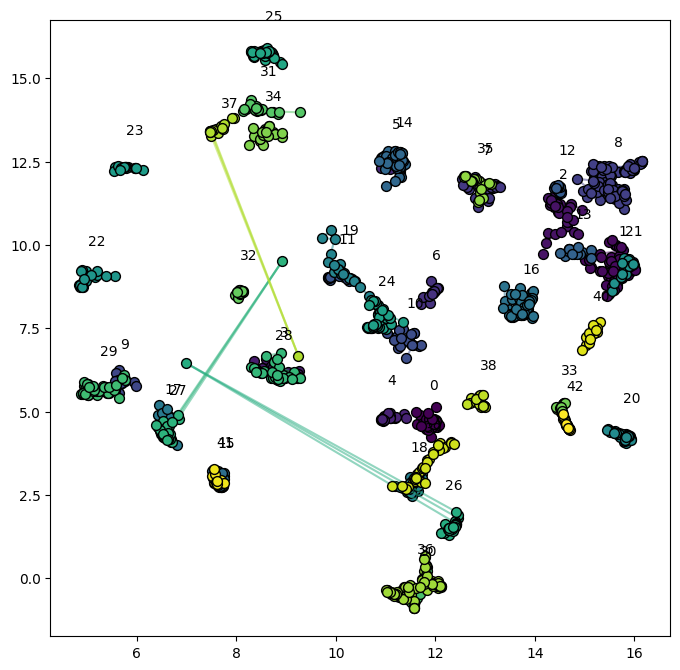

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

n_clusters = len(trim_components)
print(n_clusters)

colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

for k, component in enumerate(trim_components):
    if len(component) < 15:
        continue

    # Extract the subgraph
    subgraph = G.subgraph(component)

    # Get positions from node attributes
    pos = {node: (data['x'], data['y']) for node, data in subgraph.nodes(data=True)}

    # Plot edges
    for edge in subgraph.edges(data=True):
        x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
        y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
        ax.plot(x_coords, y_coords, color=colors[k], alpha=0.5)

    # Plot nodes
    x_coords = [pos[node][0] for node in subgraph.nodes()]
    y_coords = [pos[node][1] for node in subgraph.nodes()]
    ax.scatter(x_coords, y_coords, s=50, c=colors[k], edgecolors='k', zorder=2)

    xc = np.mean(np.array(x_coords))
    yc = np.mean(np.array(y_coords))
    ax.text(xc, yc + 1, k)
    
    # # Annotate nodes
    # for node, (x, y) in pos.items():
    #     plt.text(x, y, str(node), fontsize=12, ha='center', va='center', zorder=3)

    # # Annotate edge weights
    # for edge in subgraph.edges(data=True):
    #     x_mid = (pos[edge[0]][0] + pos[edge[1]][0]) / 2
    #     y_mid = (pos[edge[0]][1] + pos[edge[1]][1]) / 2
    #     plt.text(x_mid, y_mid, str(edge[2]['weight']), fontsize=10, ha='center', va='center', backgroundcolor='white')

plt.show()

In [22]:
coi = 26

for x in trim_components[coi]:
    u, t, i = x.split('_')
    t = int(t)
    i = int(i)
    idx = t*50 + i
    print(f'{t}-{i} ({idx // 50}): {T[idx][:5]}')

83-25 (83): ['ult' 'damage' 'enemy' 'mana' 'lane']
93-8 (93): ['sr' 'orb' 'water' 'metal' 'wood']
87-13 (87): ['team' 'enemy' 'mode' 'lane' 'played']
57-10 (57): ['nerf' 'team' 'game' 'zerg' 'units']
67-40 (67): ['pls' 'ult' 'lane' 'damage' 'karthus']
65-27 (65): ['damage' 'ult' 'dps' 'build' 'hp']
64-16 (64): ['build' 'dps' 'damage' 'ar' 'armor']
92-13 (92): ['she' 'her' 'lane' 'champion' 'ahri']
91-1 (91): ['damage' 'ult' 'mana' 'buff' 'aoe']
92-5 (92): ['damage' 'lightning' 'ww' '2x' 'build']
93-25 (93): ['damage' '1x' 'team' 'lane' 'runes']
66-24 (66): ['lane' 'ult' 'ap' 'ad' 'damage']
55-15 (55): ['team' 'ap' 'lane' 'boots' 'runes']
73-6 (73): ['lane' 'jungle' 'ap' 'fixed' 'team']
75-38 (75): ['players' 'pro' 'competitive' 'game' 'games']
87-7 (87): ['damage' 'ring' 'crit' 'build' 'd3']
94-10 (94): ['hp' 'survives' 'damage' 'team' 'wind']
85-43 (85): ['1x' 'sb' '2x' '1st' 'deck']
95-25 (95): ['wind' '31' 'water' 'fire' 'mana']
70-4 (70): ['lane' 'jungle' 'damage' 'ad' 'ult']
88-32

## spectral

In [11]:
pairwise_distances = squareform(pdist(Cu))
n = Cu.shape[0]
W = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        group_i = i // 50
        group_j = j // 50
        if abs(group_i - group_j) <= 3:
            W[i,j] = np.exp(-pairwise_distances[i,j]**2 / (2*0.5**2))
            # W[i,j] = pairwise_distances[i,j]

In [12]:
sc = SpectralClustering(
    n_clusters=100,
    affinity='precomputed',
)
sc.fit(W)

np.unique(sc.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int32),
 array([ 13,  80,   2,  11,  23,   3,   2,  73,   6,   9,  22, 110,   3,
          5,  39,   4,  12,  10,   7,  10,   8,   6,   6,   5,   8,  38,
         10,  18,  15,  75,  12,  33,  15,  17,  19,  15,  16,  44,   9,
         15,  22,   8,  29,  57,  52,  10,  58,  16,  17,  13,  15,  20,
         14,  11,  11,  14,   8,  17,  31,  31,  16,  37,  43,  13,  27,
         19,  11,  21,   7,  39,  38,  12,  18,  42,  21,  25,  40,  21,
          4,  47,  79,  25,  21,  16,  25,  22,  16,  30,  19,  54,  20,
         36,  19,  

/local/scr/stmorse/TMPDIR/ipykernel_334808/1542184438.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(Cu2d[idx,0], Cu2d[idx,1], s=30, c=colors[k], alpha=0.6, label=k)


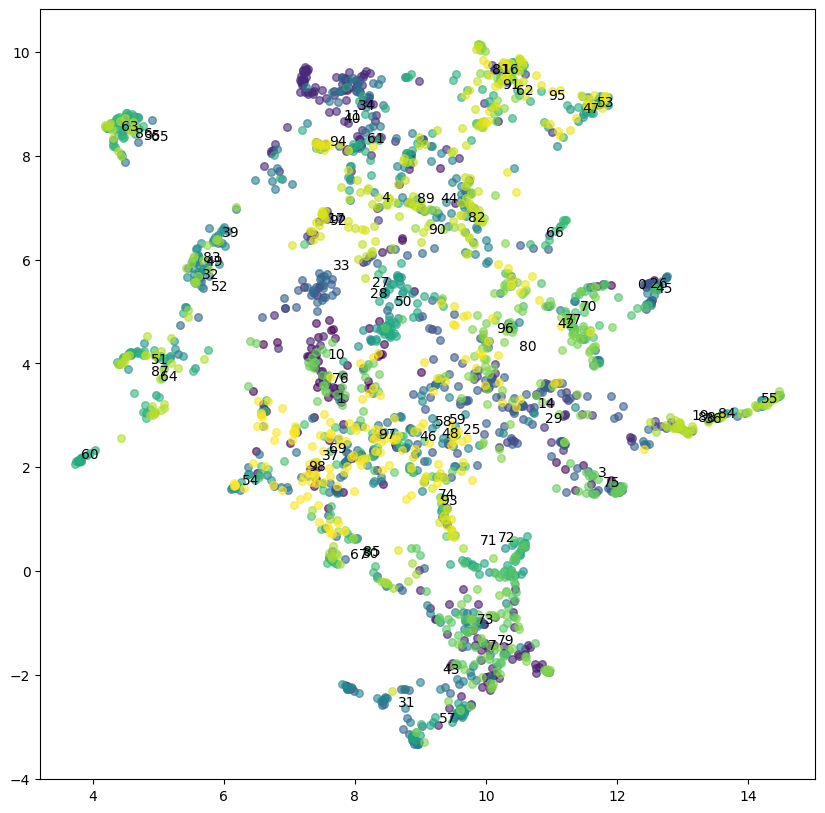

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

n_clusters = np.amax(sc.labels_)
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

for k in range(n_clusters):
    idx = np.where(sc.labels_ == k)[0]
    if len(idx) < 10:
        continue
    
    ax.scatter(Cu2d[idx,0], Cu2d[idx,1], s=30, c=colors[k], alpha=0.6, label=k)

    centroid = np.average(Cu2d[idx,:], axis=0)
    ax.text(centroid[0], centroid[1], k)

plt.show()

## hdbscan

In [11]:
hdbs = HDBSCAN(
    min_cluster_size=3,
    min_samples=None,       # None defaults to min_cluster_size
    cluster_selection_epsilon=0.0,
    max_cluster_size=20,
    metric='euclidean',
    store_centers='both',   # centroid and medoid
)
hdbs.fit(Cu)

np.unique(hdbs.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75]),
 array([61, 10, 16, 11, 20, 16,  3,  7, 12, 14,  3, 13,  8,  8, 14,  3,  3,
        13,  4,  3,  5,  6,  5, 15,  5,  3, 12,  3, 10,  7,  6,  8,  8,  5,
        16,  8,  9, 13,  4,  4,  5,  5,  5, 12,  3,  3,  6,  4,  3,  4, 10,
         6,  4,  5,  8,  5,  4,  4,  4, 10, 11,  5,  4,  5,  5, 13, 10,  7,
         3,  4,  4,  6,  4,  3,  6,  3,  3]))

/local/scr/stmorse/TMPDIR/ipykernel_1823595/2126221267.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(Cu2d[idx,0], Cu2d[idx,1], s=30, c=colors[k], alpha=0.6, label=k)


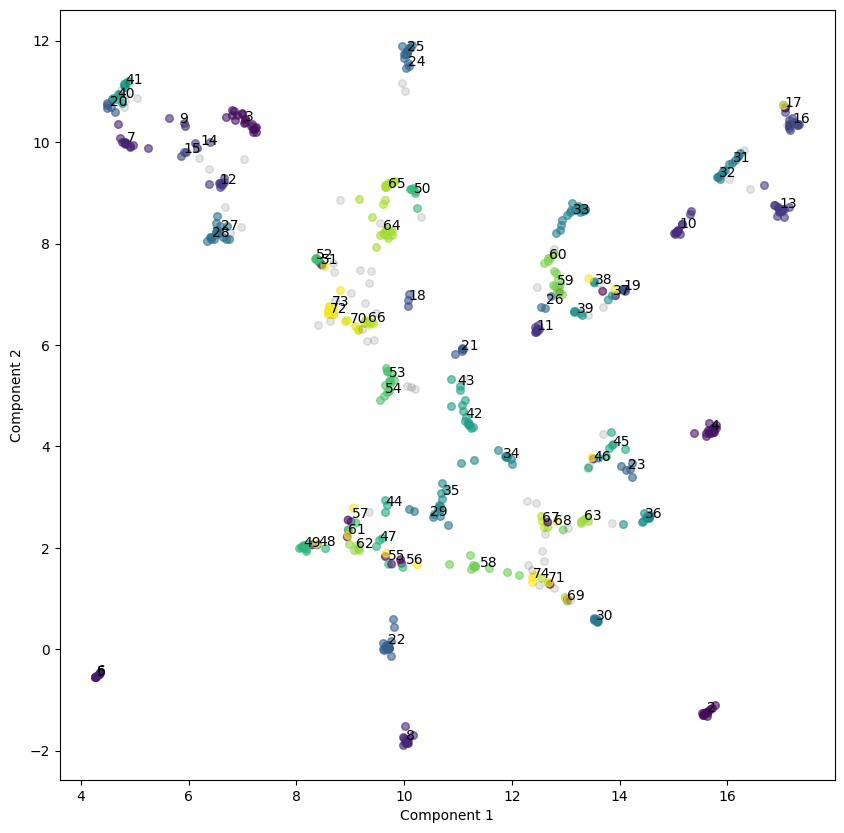

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

n_clusters = np.amax(hdbs.labels_)
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

# NOTE: skip outlier for viz
for k in range(2, n_clusters):
    idx = np.where(hdbs.labels_ == k)[0]

    if len(idx) < 2:
        continue
    
    ax.scatter(Cu2d[idx,0], Cu2d[idx,1], s=30, c=colors[k], alpha=0.6, label=k)

    centroid = np.average(Cu2d[idx,:], axis=0)
    ax.text(centroid[0], centroid[1], k)

# plot uncategorized
idx = np.where(hdbs.labels_ == -1)[0]
ax.scatter(Cu2d[idx, 0], Cu2d[idx, 1], s=30, c='k', alpha=0.1)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

plt.show()

In [14]:
coi = 23

idx = np.where(hdbs.labels_ == coi)[0]
for x in idx:
    print(f'{x} ({x // 50}) ({hdbs.probabilities_[x]:.3f}): {T[x][:5]}')

170 (3) (1.000): ['animals' 'animal' 'pet' 'eat' 'eating']
359 (7) (1.000): ['dog' 'cat' 'pet' 'adorable' 'dogs']
372 (7) (1.000): ['animals' 'food' 'hunt' 'eat' 'animal']
450 (9) (0.308): ['animals' 'meat' 'food' 'animal' 'eat']
530 (10) (0.466): ['food' 'kids' 'eat' 'bag' 'room']


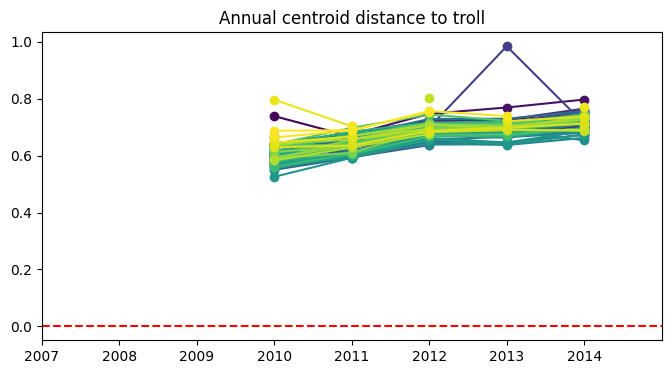

In [156]:
# check if cluster centroids are growing closer to each other
coi_a = 0
title = 'troll'

# coi_bs = [44, 58, 1, 15 ]
labs, cnts = np.unique(hdbs.labels_, return_counts=True)
coi_bs = [i for i, c in zip(labs, cnts) if i != coi_a and i != -1 and c >= 15]
labels = ['politics (D)', 'politics (R)', 'religion', 'market']
colors = plt.cm.viridis(np.linspace(0, 1, len(coi_bs)))

idx_a = np.where(hdbs.labels_==coi_a)[0]

fig, ax = plt.subplots(1,1, figsize=(8,4))

for i, coi_b in enumerate(coi_bs):
    idx_b = np.where(hdbs.labels_==coi_b)[0]

    diffs = []
    for y in range(0, len(years)):
        split_0, split_1 = 12 * 50 * y, 12 * 50 * (y+1)
        sub_a = idx_a[np.where((idx_a >= split_0) & (idx_a < split_1))[0]]
        sub_b = idx_b[np.where((idx_b >= split_0) & (idx_b < split_1))[0]]

        if len(sub_a) == 0 or len(sub_b) == 0:
            diffs.append(0)
            continue

        # compute average centroid
        avg_a = np.mean(C[sub_a], axis=0)
        avg_b = np.mean(C[sub_b], axis=0)

        # compute difference
        diff = np.linalg.norm(avg_a - avg_b)
        diffs.append(diff)

    diffs = np.array(diffs)

    diffs = np.where(diffs == 0, np.nan, diffs)
    ax.plot(range(len(diffs)), diffs, color=colors[i], linestyle='-', marker='o', label=coi_b)
    # ax.text(-0.5, diffs[0], labels[i])

ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlim([0, len(years)])
ax.set_xticks(range(len(years)))
ax.set_xticklabels(range(start_year, end_year+1))
# ax.legend()
ax.set_title(f'Annual centroid distance to {title}')
plt.show()


In [161]:
labs, cnts = np.unique(hdbs.labels_, return_counts=True)
labels_trim = [i for i, c in zip(labs, cnts) if i != -1 and c >= 15]
n = len(labels_trim)

diffs = (-1) * np.ones((5, n, n))
for xy, y in enumerate(range(3, len(years))):
    split_0, split_1 = 12 * 50 * y, 12 * 50 * (y+1)

    for xa in range(n):
        coi_a = labels_trim[xa]
        idx_a = np.where(hdbs.labels_==coi_a)[0]
        sub_a = idx_a[np.where((idx_a >= split_0) & (idx_a < split_1))[0]]

        for xb in range(xa, n):
            coi_b = labels_trim[xb]
            idx_b = np.where(hdbs.labels_==coi_b)[0]
            sub_b = idx_b[np.where((idx_b >= split_0) & (idx_b < split_1))[0]]

            if len(sub_a) == 0 or len(sub_b) == 0:
                diffs[xy,xa,xb] = -1
                continue

            # compute average centroid
            avg_a = np.mean(C[sub_a], axis=0)
            avg_b = np.mean(C[sub_b], axis=0)

            # compute difference
            diff = np.linalg.norm(avg_a - avg_b)
            diffs[xy,xa,xb] = diff

diffs[diffs == -1] = np.nan

change = diffs[1:,:,:] - diffs[:-1,:,:]
print(change.shape)


(4, 70, 70)


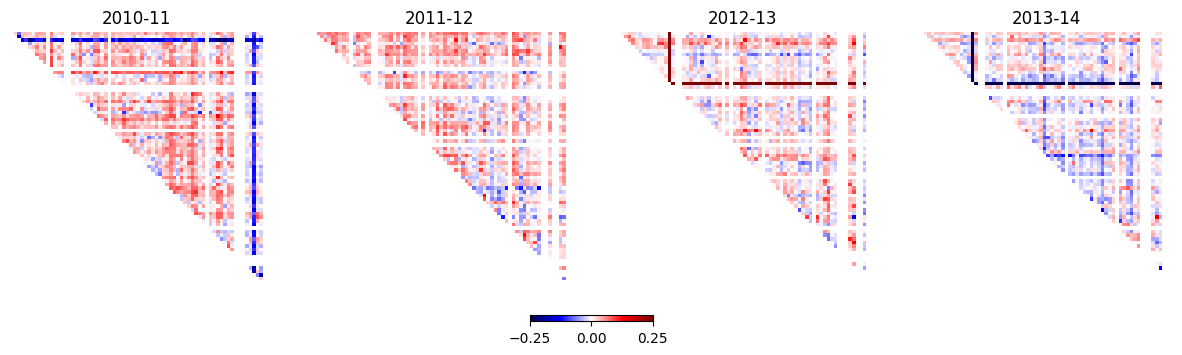

In [174]:
fig, ax = plt.subplots(1,4, figsize=(15,4), sharey=True)

titles = ['2010-11', '2011-12', '2012-13', '2013-14']
for i in range(4):
    cb = ax[i].imshow(change[i,:,:], 
                 cmap='seismic',
                 vmin=-0.25, vmax=0.25)
    
    ax[i].axis('off')
    ax[i].set_title(titles[i])

fig.colorbar(cb, ax=ax, orientation='horizontal', fraction=0.02, pad=0.1)
# plt.tight_layout()
plt.show()

In [185]:
print(change[0,:5,:5])

[[ 0.          0.02335768 -0.07238881  0.02830082  0.03510942]
 [        nan  0.         -0.18090309  0.03442461  0.01825497]
 [        nan         nan  0.         -0.16067962 -0.09863035]
 [        nan         nan         nan  0.          0.00367121]
 [        nan         nan         nan         nan  0.        ]]


In [187]:
labels_trim[2]

np.int64(4)

## comparison to RW

/sciclone/geograd/stmorse/dtm/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


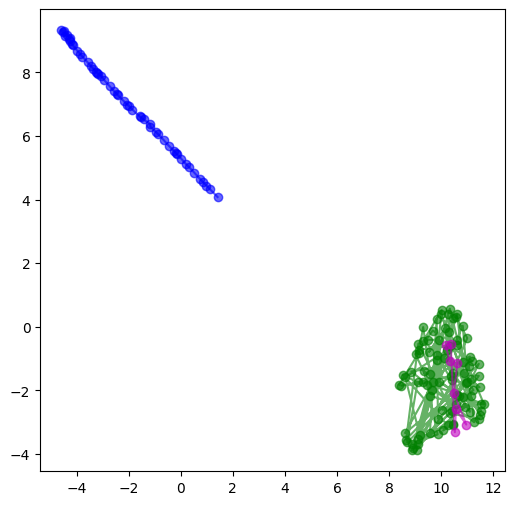

In [177]:
# vars
np.random.seed(314)
d = 384     # dimension
s = 1       # stdev
n = 50      # num steps (time periods)
cois = [3, 14]

# generate RW
steps = np.random.normal(loc=0, scale=s, size=(n, d))
walk = np.cumsum(steps, axis=0)

# get cluster centroids and standardize
clusters = []
lengths = []
for coi in cois:
    idx = np.where((hdbs.labels_==coi) & (hdbs.probabilities_>=0.75))[0]
    lengths.append(len(idx))

    # standardize
    Cm  = C[idx]
    Cm -= np.mean(Cm, axis=0)
    csd = np.std(Cm, axis=0)
    csd[csd == 0] = 1e-8   # gracefully handle any dims that are exact
    Cm /= csd

    clusters.append(Cm)
clusters = np.vstack(clusters)

# put in one matrix
data = np.vstack((
    walk, clusters
))

# dim reduce
data2d = umap.UMAP().fit_transform(data)

# plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(data2d[:n,0], data2d[:n,1], 
        color='b', linestyle='-', marker='o', alpha=0.6, label='RW')
ax.plot(data2d[n:(n+lengths[0]),0], data2d[n:(n+lengths[0]),1],
        color='g', linestyle='-', marker='o', alpha=0.6, label=f'Cluster {cois[0]}')
ax.plot(data2d[(n+lengths[0]):,0], data2d[(n+lengths[0]):,1],
        color='m', linestyle='-', marker='o', alpha=0.6, label=f'Cluster {cois[1]}')

# ax.legend()
plt.show()

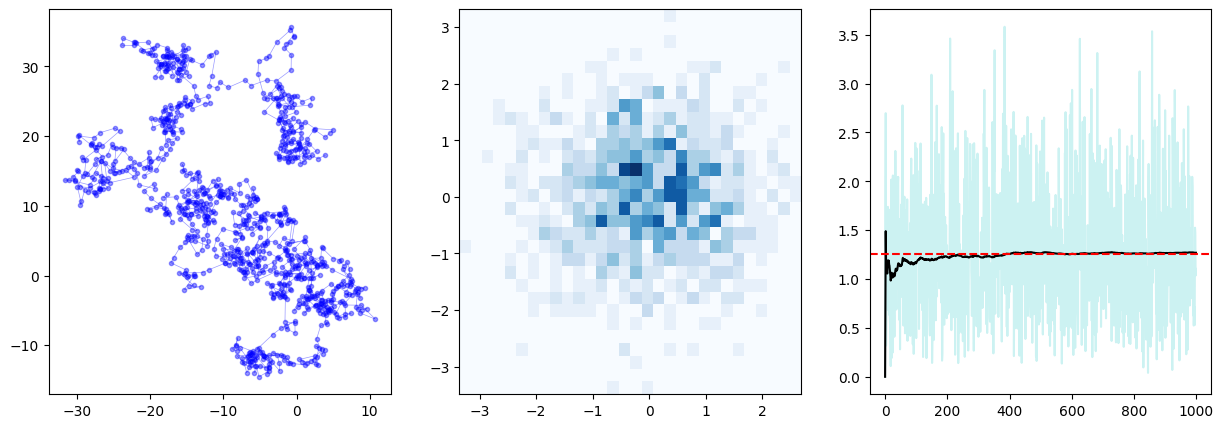

In [60]:
np.random.seed(11)

d = 2
s = 1
cov = s * np.identity(d)
n = 1000

steps = np.random.multivariate_normal([0,0], cov, size=n-1)
steps = np.vstack(([[0,0]], steps))
walk  = np.cumsum(steps, axis=0)

step_sizes = np.linalg.norm(steps, axis=1)

step_size_means = np.cumsum(step_sizes) / np.arange(1, n+1)

mean_steps = np.cumsum(steps, axis=0) / np.arange(1, n+1)[:, None]

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].plot(walk[:,0], walk[:,1], color='b', marker='.', linestyle='-', linewidth=0.5, alpha=0.4)
axs[1].hist2d(steps[:, 0], steps[:, 1], bins=30, cmap='Blues', density=True, cmin=0, cmax=1)

axs[2].plot(range(n), step_sizes, 'c-', alpha=0.2)
axs[2].plot(range(n), step_size_means, 'k-')
m = s * np.sqrt(np.pi / 2)
axs[2].axhline(y=m, color='r', linestyle='--')

plt.show()

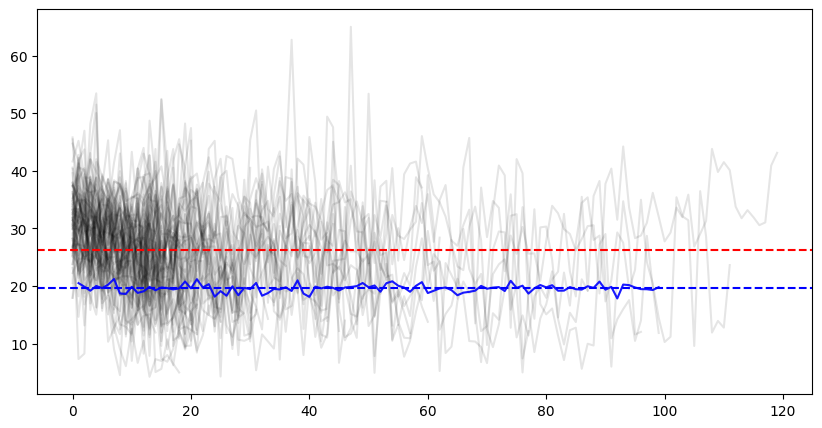

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

# PLOT CENTROID STEPS

labs, cnts = np.unique(hdbs.labels_, return_counts=True)
labels_trim = [i for i, c in zip(labs, cnts) if i != -1 and c >= 15]
n = len(labels_trim)

all_step_sizes = []

# look at mean step sizes and step mean in data
for coi in labels_trim:

    idx = np.where(hdbs.labels_==coi)[0]
    cstd = C[idx].copy()
    cstd -= np.mean(cstd, axis=0)
    std  = np.std(cstd, axis=0)
    std[std==0] = 1e-8
    cstd /= std
    steps = cstd[1:,:] - cstd[:-1,:]
    step_sizes = np.linalg.norm(steps, axis=1)
    all_step_sizes.append(step_sizes)

    ax.plot(range(len(step_sizes)), step_sizes, 'k-', alpha=0.1)

all_step_sizes = np.hstack(all_step_sizes)
total_mean_step_size = np.mean(all_step_sizes)

ax.axhline(y=total_mean_step_size, color='r', linestyle='--')

# PLOT RW

np.random.seed(314)
n = 100
d = 384
mu = np.zeros(d)
cov = 1 * np.identity(d)
steps = np.random.multivariate_normal(mu, cov, size=n-1)
steps = np.vstack((np.zeros((1,d)), steps))
walk  = np.cumsum(steps, axis=0)
step_sizes = np.linalg.norm(steps, axis=1)
ax.plot(range(1, len(step_sizes)), step_sizes[1:], 'b-', alpha=0.9)

# theoretical mean
p = 1 * np.sqrt(2) * np.sqrt(C.shape[1] / 2)
ax.axhline(y=p, color='b', linestyle='--')

plt.show()